In [78]:
import pandas as pd
import shapely
from shapely.geometry import Polygon
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely import wkt
import contextily as ctx
import matplotlib.colors as mcolors
import numpy as np
import holoviews as hv
from holoviews import dim, opts


#xi number of cahrging stations ti install on piint i

excel_data_df = pd.read_excel('Demand_data.xlsx')
excel_data_df=excel_data_df.dropna()

________________________________________________

In [79]:
excel_data_df['geometry'] = gpd.GeoSeries.from_wkt(excel_data_df['geometry'])
gdf = gpd.GeoDataFrame(excel_data_df, geometry='geometry', crs = 'EPSG:4326')




# change geometry 
gdf['geometry'] = gdf['geometry'].centroid
gdf.head()


C:\Users\OLEGUE~1\AppData\Local\Temp/ipykernel_7024/2265417050.py:8: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf['geometry'] = gdf['geometry'].centroid


,Ref,geometry,Number of Charging Points,Number of Slow Charging Points,Number of Fast Charging Points,Number of Rapid Charging Points,Number of PoI,Number of Potential Locations,Distance from Centre,NEIGHBORS,...,x,y,Demand_0 (Full Electric),Demand_0 (PHEV),Demand_1 (Full Electric),Demand_1 (PHEV),Demand_2 (Full Electric),Demand_2 (PHEV),Demand_3 (Full Electric),Demand_3 (PHEV)
0,1.0,POINT (-3.10147 56.44546),0.0,0.0,0.0,0.0,0.0,0.0,8403.561223,"[2, 15, 16]",...,1.0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2.0,POINT (-3.10161 56.45035),0.0,0.0,0.0,0.0,0.0,0.0,8296.571785,"[1, 3, 15, 16, 17]",...,2.0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3.0,POINT (-3.10175 56.45525),0.0,0.0,0.0,0.0,0.0,0.0,8224.414999,"[2, 4, 16, 17, 18]",...,3.0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4.0,POINT (-3.10189 56.46015),0.0,0.0,0.0,0.0,0.0,0.0,8188.011805,"[3, 5, 17, 18, 19]",...,4.0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5.0,POINT (-3.10204 56.46505),0.0,0.0,0.0,0.0,0.0,0.0,8187.839098,"[4, 6, 18, 19, 20]",...,5.0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [134]:
gdf['Number of Potential Locations'].replace(to_replace = 0, value = np.nan, inplace=True)

for x in range(20):
    gdf['Number of Potential Locations'].replace(to_replace = x, value = 10, inplace=True)


# gdf['Number of Potential Locations'].replace(to_replace = 0, value = np.nan, inplace=True)

# for x in range(20):
#     gdf['Number of Potential Locations'].replace(to_replace = x, value = 10, inplace=True)

# gdf['real_potential_loc']=np.minimum(gdf['Number of Charging Points'],gdf['Number of Potential Locations'])

In [179]:
#gpd.GeoSeries.translate(gdf.iloc[0,1], xoff=0.0)

import random

for x in range(len(gdf)):
    original_point = gpd.GeoSeries(gdf.iloc[x,1])
    randomized_point=original_point.translate(random.uniform(0, 150),random.uniform(0, 150))
    gdf.iloc[x,1]=randomized_point

In [150]:
gdf.head(20)

,Ref,geometry,Number of Charging Points,Number of Slow Charging Points,Number of Fast Charging Points,Number of Rapid Charging Points,Number of PoI,Number of Potential Locations,Distance from Centre,NEIGHBORS,...,x,y,Demand_0 (Full Electric),Demand_0 (PHEV),Demand_1 (Full Electric),Demand_1 (PHEV),Demand_2 (Full Electric),Demand_2 (PHEV),Demand_3 (Full Electric),Demand_3 (PHEV)
0,1.0,POINT (332194.338 728686.675),1.0,0.0,0.0,0.0,0.0,1.0,8403.561223,"[2, 15, 16]",...,1.0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2.0,POINT (332194.338 729231.944),NaN,0.0,0.0,0.0,0.0,NaN,8296.571785,"[1, 3, 15, 16, 17]",...,2.0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3.0,POINT (332194.338 729777.213),NaN,0.0,0.0,0.0,0.0,NaN,8224.414999,"[2, 4, 16, 17, 18]",...,3.0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4.0,POINT (332194.338 730322.482),NaN,0.0,0.0,0.0,0.0,NaN,8188.011805,"[3, 5, 17, 18, 19]",...,4.0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5.0,POINT (332194.338 730867.751),NaN,0.0,0.0,0.0,0.0,NaN,8187.839098,"[4, 6, 18, 19, 20]",...,5.0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,6.0,POINT (332194.338 731413.020),NaN,0.0,0.0,0.0,0.0,NaN,8223.899162,"[5, 7, 19, 20, 21]",...,6.0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,7.0,POINT (332194.338 731958.289),NaN,0.0,0.0,0.0,0.0,NaN,8295.719517,"[6, 8, 20, 21, 22]",...,7.0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,8.0,POINT (332194.338 732503.558),NaN,0.0,0.0,0.0,0.0,NaN,8402.383216,"[7, 9, 21, 22, 23]",...,8.0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,9.0,POINT (332194.338 733048.827),NaN,0.0,0.0,0.0,0.0,NaN,8542.585187,"[8, 10, 22, 23, 24]",...,9.0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,10.0,POINT (332194.338 733594.096),NaN,0.0,0.0,0.0,0.0,NaN,8714.706890,"[9, 11, 23, 24, 25]",...,10.0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [30]:
#To create custom colours, but not even necessary
from matplotlib.colors import LinearSegmentedColormap
colors = [(0,0,1,c) for c in np.linspace(0,1,100)]
cmapblue = mcolors.LinearSegmentedColormap.from_list('mycmap', colors, N=5)
colors = [(1,1,1,0), (0,0,0,1)]
cm = LinearSegmentedColormap.from_list('custom', colors, N=256, gamma=0)

(331845.5227704066, 349100.57685281435, 728984.0680994337, 734816.0483050209)

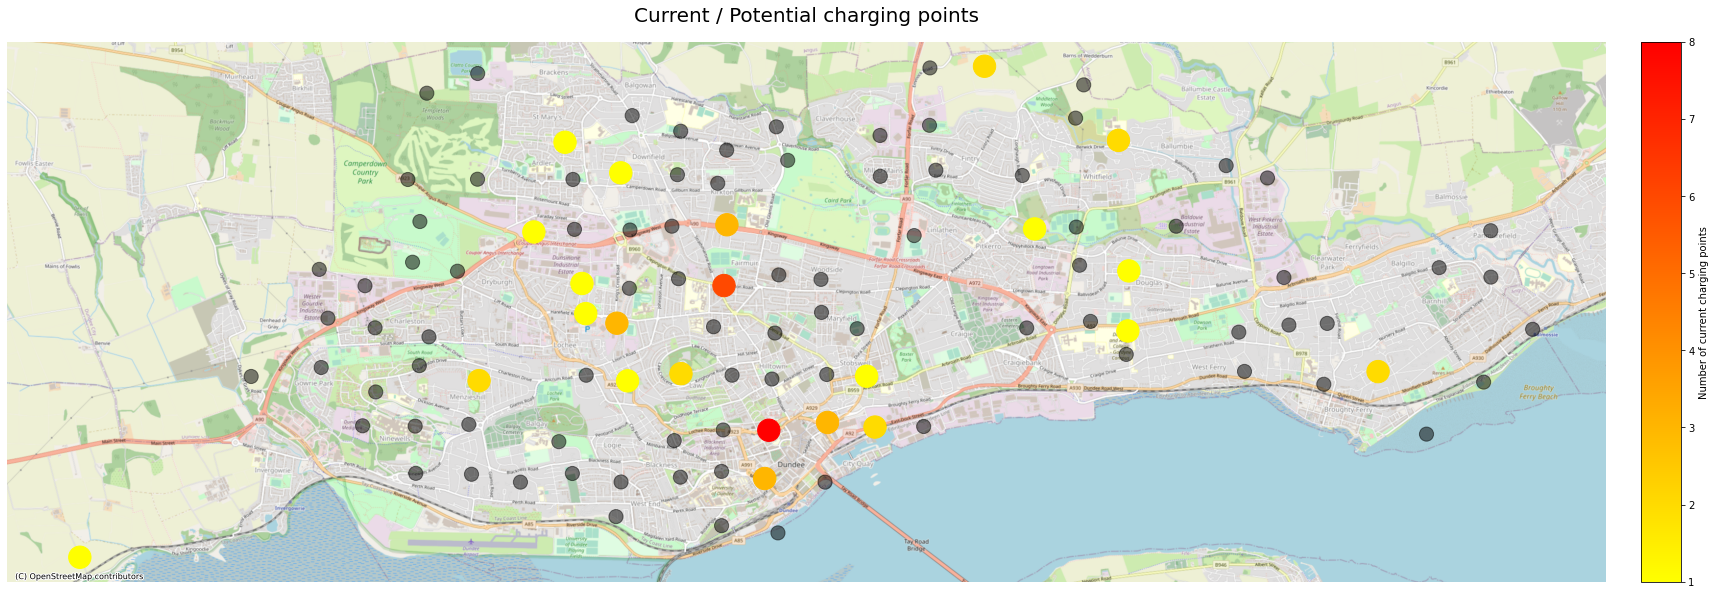

In [184]:
#centroids_df.plot(marker='*', color='green', markersize=5);
from mpl_toolkits.axes_grid1 import make_axes_locatable

fig, ax = plt.subplots(1, 1, figsize=(30,20))


divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="2.5%", pad=0.5)


gdf = gdf.to_crs('EPSG:27700')
gdf.plot(column='Number of Charging Points', cmap='autumn_r', legend=True, alpha=1 , markersize=500, ax=ax, cax=cax, zorder=2, legend_kwds={'label': "Number of current charging points"})
#fig, axs = plt.c(2, 2)

gdf.plot(column='Number of Potential Locations', cmap=cm, legend=False, alpha=0.7, markersize=200, ax=ax, cax=cax, zorder=1)


ax.axis('off')

ax.set_title('Current / Potential charging points', fontsize=20, pad=20)



ctx.add_basemap(ax, source=ctx.providers.OpenStreetMap.Mapnik,crs='EPSG:27700')
ax.axis('off')


c:\ProgramData\Anaconda3\lib\site-packages\contextily\tile.py:581: UserWarning: The inferred zoom level of 30 is not valid for the current tile provider (valid zooms: 0 - 19).
  warnings.warn(msg)


(-3.1166722307182315,
 -2.8228055377278123,
 56.44216941108917,
 56.51449160850579)

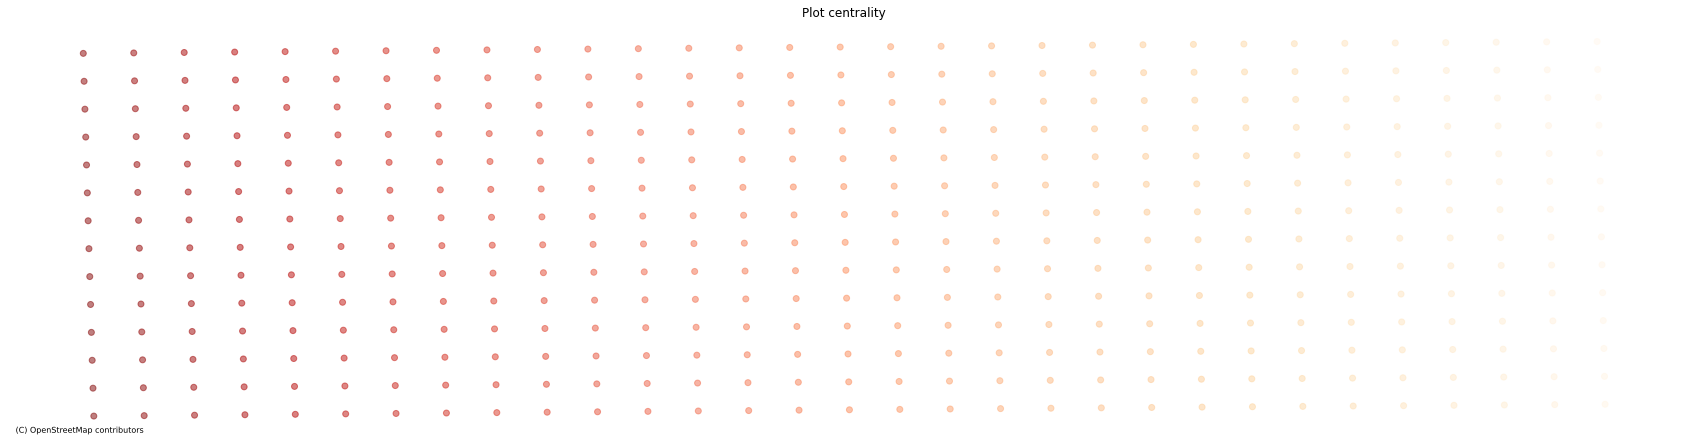

In [11]:
gdf = centroids_df.to_crs('EPSG:27700')
axes = centroids_df.plot(figsize=(30,20), cmap='OrRd_r', alpha=0.5)
#fig, axs = plt.c(2, 2)

axes.axis('off')

axes.set_title('Plot centrality')

ctx.add_basemap(axes, source=ctx.providers.OpenStreetMap.Mapnik,crs='EPSG:27700')
axes.axis('off')


In [ ]:
fig, axs = plt.subplots(2, 2)
axes = gdf.plot(figsize=(30,20), column='Demand_3', cmap=cm, legend=False, alpha=0.5)

#fig, axs = plt.c(2, 2)

ctx.add_basemap(axes, source=ctx.providers.OpenStreetMap.Mapnik,crs='EPSG:4326')
axes.axis('off')

In [78]:
labels= excel_data_df['Demand_0'].values
labels

labels_reshaped=np.reshape(labels, (31, 14)) 
labels_reshaped

array([[    0.      ,     0.      ,     0.      ,     0.      ,
            0.      ,     0.      ,     0.      ,     0.      ,
            0.      ,     0.      ,     0.      ,     0.      ,
            0.      ,     0.      ],
       [    0.      ,     0.      ,     0.      ,     0.      ,
            0.      ,     0.      ,     0.      ,     0.      ,
            0.      ,     0.      ,     0.      ,     0.      ,
            0.      ,     0.      ],
       [    0.      ,     0.      ,     0.      ,     0.      ,
            0.      ,     0.      ,     0.      ,     0.      ,
            0.      ,     0.      ,     0.      ,     0.      ,
            0.      ,     0.      ],
       [    0.      ,     0.      ,     0.      ,     0.      ,
            0.      ,     0.      ,     0.      ,     0.      ,
            0.      ,     0.      ,     0.      ,     0.      ,
            0.      ,     0.      ],
       [    0.      ,     0.      ,     0.      ,     0.      ,
            0.      

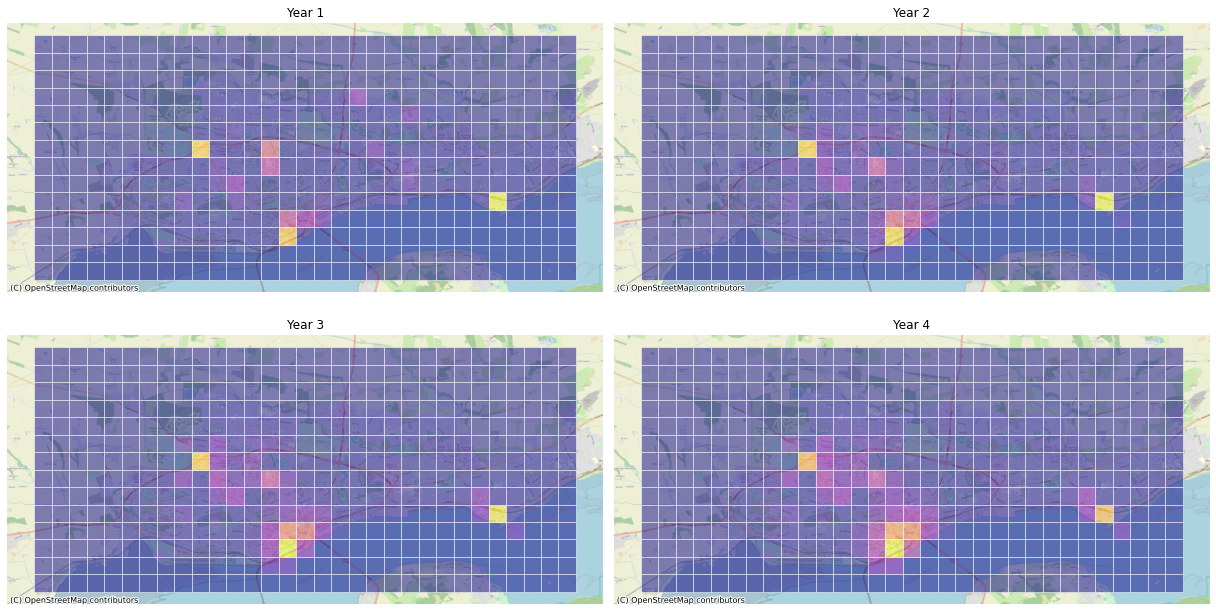

In [91]:
fig, axs = plt.subplots(2, 2, figsize=(17,9))



#year 0
gdf.plot(ax=axs[0, 0], column='Demand_0', cmap='plasma', legend=False, alpha=0.5, edgecolor='white')
ctx.add_basemap(ax=axs[0, 0], source=ctx.providers.OpenStreetMap.Mapnik,crs='EPSG:27700')

#year 1
gdf.plot(ax=axs[0, 1], column='Demand_1', cmap='plasma', legend=False, alpha=0.5, edgecolor='white')
ctx.add_basemap(ax=axs[0, 1], source=ctx.providers.OpenStreetMap.Mapnik,crs='EPSG:27700')

#year 2
gdf.plot(ax=axs[1, 0], column='Demand_2', cmap='plasma', legend=False, alpha=0.5, edgecolor='white')
ctx.add_basemap(ax=axs[1, 0], source=ctx.providers.OpenStreetMap.Mapnik,crs='EPSG:27700')

#year 3
gdf.plot(ax=axs[1, 1], column='Demand_3', cmap='plasma', legend=False, alpha=0.5, edgecolor='white')
ctx.add_basemap(ax=axs[1, 1], source=ctx.providers.OpenStreetMap.Mapnik,crs='EPSG:27700')



# Hide x labels and tick labels for top plots and y ticks for right plots.
# for ax in axs.flat:
#     ax.label_outer()
axs[0, 0].axis('off')
axs[0, 1].axis('off')
axs[1, 0].axis('off')
axs[1, 1].axis('off')

axs[0, 0].set_title('Year 1')
axs[0, 1].set_title('Year 2')
axs[1, 0].set_title('Year 3')
axs[1, 1].set_title('Year 4')
 

#axs[1, 1].imshow(labels_reshaped)
fig.tight_layout()

